In [105]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [199]:
max_length0 = '40mlength'
fold = '*'
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*fold{}.csv'.format(fold)

In [207]:
def read_reports(path, layers, max_length):
    dfs = []
    kernel_sizes = []
    accuracy_values = []
    all_files = glob.glob(path)
    for filename in all_files:
        if layers in filename and max_length in filename:
            dfs.append(pd.read_csv(filename))
            kernel_substring_location = filename.find('kernel')
            kernel_number = filename[kernel_substring_location - 2:kernel_substring_location]
            if not kernel_number.isnumeric:
                kernel_number = kernel_number[1:len(kernel_number)]
            ksize = int(kernel_number)
#             if (ksize == 3 or ksize == 5 or ksize == -3 or ksize == -5) and layers != '1cnn':
#                 continue
            kernel_sizes.append(ksize)
    for k in range(len(kernel_sizes)):
        if kernel_sizes[k] < 0:
            kernel_sizes[k] = -kernel_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    sorted_data = sorted(zip(kernel_sizes, accuracy_values), key=lambda x: x[0])
    kernel_sizes, accuracy_values = zip(*sorted_data)
#     print(kernel_sizes, accuracy_values)
    return kernel_sizes, accuracy_values

In [201]:
def cal_average(kernel_sizes, accuracy_values):
    identical = 0
    new_kernel_sizes = [kernel_sizes[0]]
    new_accuracy_values = [accuracy_values[0]]
    current_kernel = kernel_sizes[0]
    current_idx = 0
    current_kernel_count = 1
    for i in range(1, len(kernel_sizes)):
        next_kernel = kernel_sizes[i]
        if next_kernel != current_kernel:
            identical = max(identical, current_kernel_count)
            current_kernel = next_kernel
            current_kernel_count = 1
            current_idx += 1
            new_kernel_sizes.append(next_kernel)
            new_accuracy_values.append(accuracy_values[i])
        else:
            past_acc_sum = new_accuracy_values[current_idx] * current_kernel_count
            current_kernel_count += 1
            new_accuracy_values[current_idx] = (past_acc_sum + accuracy_values[i]) / current_kernel_count
    print(len(new_kernel_sizes), len(new_accuracy_values))
    print(new_kernel_sizes, new_accuracy_values)
    print(identical)
    return new_kernel_sizes, new_accuracy_values

In [208]:
layers0 = '4cnn'

kernel_sizes0, accuracy_values0 = read_reports(path, layers0, max_length0)
kernel_sizes0, accuracy_values0 = cal_average(kernel_sizes0, accuracy_values0)

9 9
[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.9677274007321881, 0.966009574767671, 0.9627522763540787, 0.9617103163428142, 0.9641978785318688, 0.9638036233924716, 0.9614287055289589, 0.9603022622735381, 0.961503801745987]
5


In [209]:
layers1 = '3cnn'

kernel_sizes1, accuracy_values1 = read_reports(path, layers1, max_length0)
kernel_sizes1, accuracy_values1 = cal_average(kernel_sizes1, accuracy_values1)

9 9
[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.9670609218060641, 0.9667323758565661, 0.963756688256829, 0.9636064958227729, 0.964197878531869, 0.9643950061015676, 0.9628367595982352, 0.9642448136675114, 0.9623110860790389]
5


In [210]:
layers2 = '2cnn'

kernel_sizes2, accuracy_values2 = read_reports(path, layers2, max_length0)
for i in range(len(kernel_sizes2)):
    if kernel_sizes2[i] == 10:
        print(accuracy_values2[i])
kernel_sizes2, accuracy_values2 = cal_average(kernel_sizes2, accuracy_values2)

0.9646109077255234
0.9644231671829532
0.9630620482493194
0.9651271942175912
0.9630620482493194
9 9
[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.9658969304421289, 0.966413216934197, 0.9650990331362058, 0.9643292969116681, 0.963925654745142, 0.9635407866328733, 0.9636440439312869, 0.9634093682530741, 0.9640570731249414]
5


In [211]:
layers3 = '1cnn'

kernel_sizes3, accuracy_values3 = read_reports(path, layers3, max_length0)
kernel_sizes3, accuracy_values3 = cal_average(kernel_sizes3, accuracy_values3)

9 9
[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.9619731531024126, 0.9622735379705247, 0.9618323476954849, 0.9618605087768703, 0.9603210363277951, 0.9592133671266311, 0.9594668168591006, 0.9583873087393222, 0.9582277292781376]
5


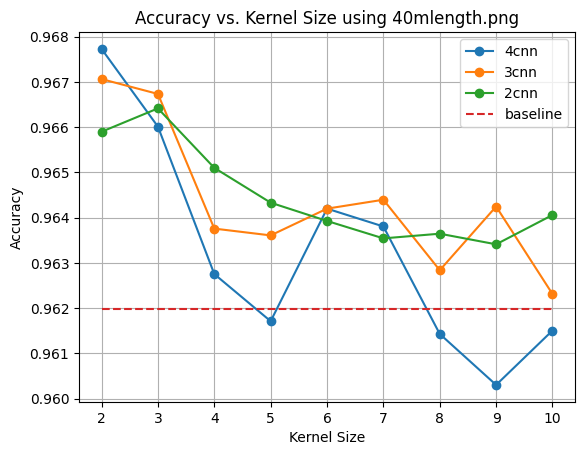

In [212]:
plt.plot(kernel_sizes0, accuracy_values0, '-o', label=layers0)
plt.plot(kernel_sizes1, accuracy_values1, '-o', label=layers1)
plt.plot(kernel_sizes2, accuracy_values2, '-o', label=layers2)
plt.plot(kernel_sizes2, [accuracy_values3[0] for i in accuracy_values2], '--', label='baseline')
plt.xticks([i for i in range(2, kernel_sizes0[len(kernel_sizes0)-1]+1, 2 if kernel_sizes0[len(kernel_sizes0)-1]>=20 else 1)])
plt.xlabel('Kernel Size')
plt.ylabel('Accuracy')
# plt.title('Accuracy vs. Kernel Size using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.title('Accuracy vs. Kernel Size using {0}.png'.format(max_length0))
plt.grid(True)
plt.legend()
# plt.savefig('./reports/figures/Accuracy vs. Kernel Size using {0}.png'.format(max_length0))
plt.savefig('./reports/figures/Accuracy vs. Kernel Size using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.show()